## Usmab Bhai Code Example 
[source](https://www.geeksforgeeks.org/k-means-clustering-introduction/)

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore', category=FutureWarning)
print(f'numpy version is  : {np.__version__}')
print(f'pandas version is  : {pd.__version__}')
print(f'seaborn version is  : {sns.__version__}')

numpy version is  : 1.24.3
pandas version is  : 2.0.3
seaborn version is  : 0.12.2


In [11]:
os.makedirs("IMAGES", exist_ok=True)

## Load Data

In [2]:
df = pd.read_excel("Data/Data Set.xlsx")
print(f'column names are : {df.columns}')

column names are : Index(['Date', 'Intervals', 'Load (kW)', 'PV Power (kW)'], dtype='object')


In [3]:
data = df[['Load (kW)', 'PV Power (kW)']]

In [5]:
X = np.array(data.copy())

## Elbow Method
This method is used to find idean number of groups to divide data into.

In [8]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1, 48):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

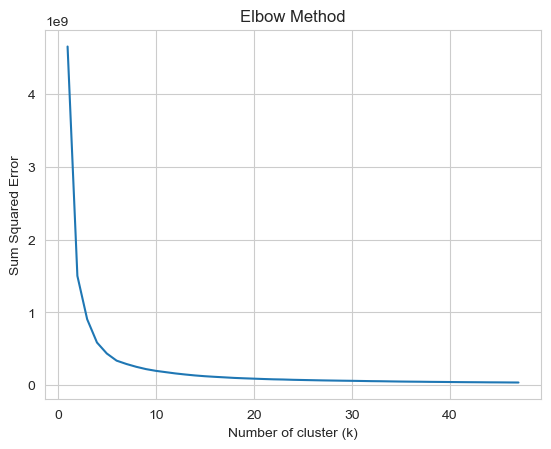

In [12]:
# Plot the Elbow Diagram
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1, 48), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
plt.savefig(f'IMAGES/elbow.png') 
plt.show()

## Build Clusterig Model

In [13]:
kmeans = KMeans(n_clusters=48, random_state=2)
kmeans.fit(X)

KMeans(n_clusters=48, random_state=2)

In [14]:
# Let's print the cluster centers
print(f'cluster centers are : {kmeans.cluster_centers_}')

cluster centers are : [[8.43954655e+02 7.55796667e+00]
 [5.03132153e+02 1.11892023e+03]
 [3.53371408e+02 8.48992444e-01]
 [5.12946417e+02 1.68751143e+03]
 [4.72492399e+02 5.64952000e+02]
 [5.66944998e+02 1.93946836e+02]
 [1.07713534e+03 4.74459070e+00]
 [7.39502724e+02 8.05082354e+02]
 [6.72492100e+02 1.92571048e+02]
 [5.19754348e+02 6.73297613e+00]
 [8.51492502e+02 1.07677860e+03]
 [5.67770928e+02 1.88778063e+03]
 [5.79841013e+02 8.53362739e+02]
 [5.37055328e+02 1.39044685e+03]
 [7.74001868e+02 1.97428813e+02]
 [9.94784831e+02 4.68061402e+00]
 [6.79733087e+02 8.96769740e+00]
 [2.94657098e+02 1.22762017e+00]
 [4.80411954e+02 3.41995000e+02]
 [8.49728407e+02 3.66018250e+02]
 [6.54812176e+02 1.54563126e+03]
 [5.15430122e+02 9.92367235e+01]
 [8.06287655e+02 1.38944518e+03]
 [6.49323564e+02 1.02714844e+03]
 [5.84089125e+02 4.60639217e+02]
 [9.05013540e+02 8.53707861e+02]
 [4.77302789e+02 1.25994401e+03]
 [7.38862864e+02 4.86532386e+02]
 [6.34072373e+02 1.03861344e+02]
 [5.77825705e+02 2.11

## Predict the Cluster Group

In [15]:
pred = kmeans.fit_predict(X)
print(f'predictions are : {pred}')

predictions are : [ 2 33  2 ... 37 16 38]


## Plot Results

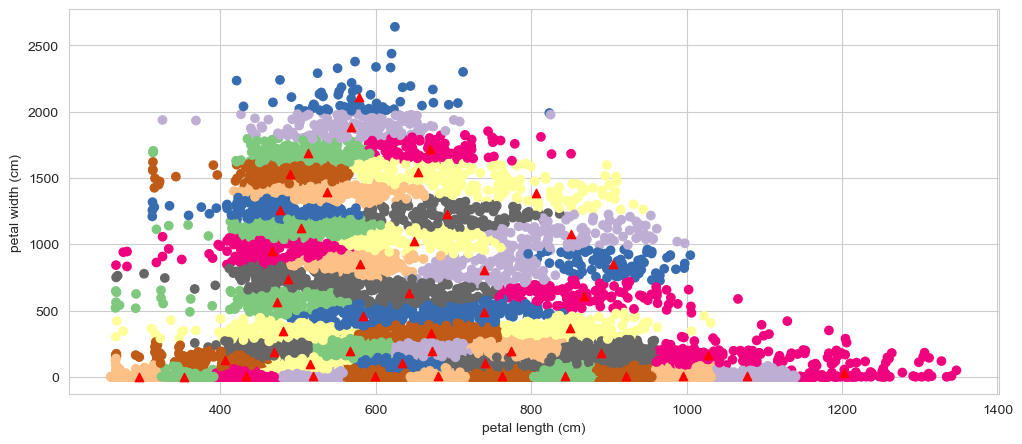

In [23]:
plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[:2]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.savefig(f"IMAGES/clsuters.png")
plt.show()